### Extract .wav file features

In [14]:
%%capture thiscell
#hide output of this cell
%run ./fft.ipynb

In [15]:
from helper.wavfile_feature_helper import WavFileHelper
wavfilehelper = WavFileHelper()
audiodata = []
for filename in metadata.file_name:
    path = '../data/'+filename
    data = wavfilehelper.read_file_properties(path)
    audiodata.append(data)
# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [16]:
print(audiodf.shape)

(1618, 3)


### Overall features

In [17]:
#show the features of each wav file
print(audiodf)

      num_channels  sample_rate  bit_depth
0                1        43900         16
1                1        43900         16
2                1        43900         16
3                1        43900         16
4                1        43900         16
...            ...          ...        ...
1613             1        81920         16
1614             1        81920         16
1615             1        81920         16
1616             1        81920         16
1617             1        81920         16

[1618 rows x 3 columns]


### Channel distribution

In [18]:
#show the percentage of channels
audiodf.num_channels.value_counts(normalize=True).rename_axis('channel nums').reset_index(name='ratio')

,channel nums,ratio
0,1,1.0


### Sample rate distribution

In [19]:
#distribution of sample rate
audiodf.sample_rate.value_counts(normalize=True).rename_axis('sample rate').reset_index(name='ratio')

,sample rate,ratio
0,81920,0.269468
1,80000,0.141533
2,60600,0.110630
3,81600,0.060569
4,14900,0.041409
5,10000,0.038937
6,10240,0.038319
7,20000,0.038319
8,30000,0.033375
9,166600,0.032756


### Bit-depth distribution

In [20]:
#distribution of bit_depth
audiodf.bit_depth.value_counts(normalize=True).rename_axis('bit depth').reset_index(name='ratio')

,bit depth,ratio
0,16,0.993820
1,8,0.005562
2,12,0.000618


### Merits of Librosa
This part will investigate the advantage of using librosa to process the audio file

- Sample rate conversion

In [21]:
from scipy.io import wavfile as wav
path='../data/'+metadata.file_name[4]
librosa_audio, librosa_sample_rate = librosa.load(path)
scipy_sample_rate, scipy_audio = wav.read(path)
print('Original sample rate:', scipy_sample_rate)
print('Librosa sample rate:', librosa_sample_rate)

Original sample rate: 43900
Librosa sample rate: 22050


- Bit-depth normalization

In [22]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -13248 to 17600
Librosa audio file min~max range: -0.28702584 to 0.4162316


### MFCC samples
From fft waveform, we can see that it is hard to differentiate the waveforms even they are in the same category. MFCC includes the spectrum along with the time axis will be more informative than FFT waveform

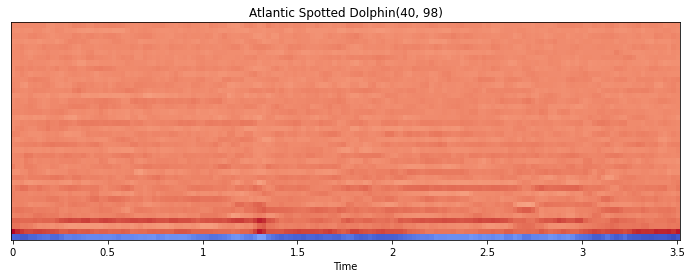

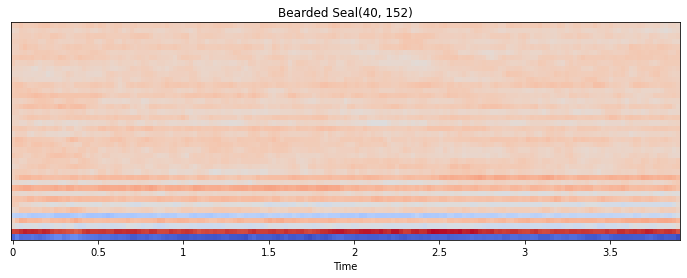

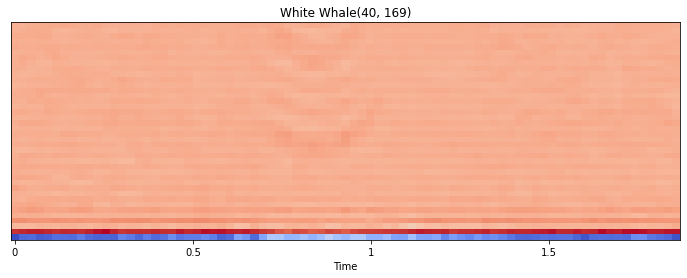

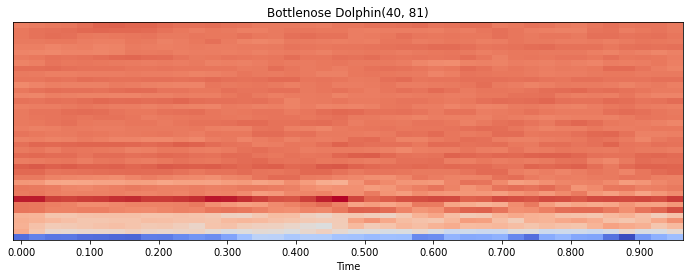

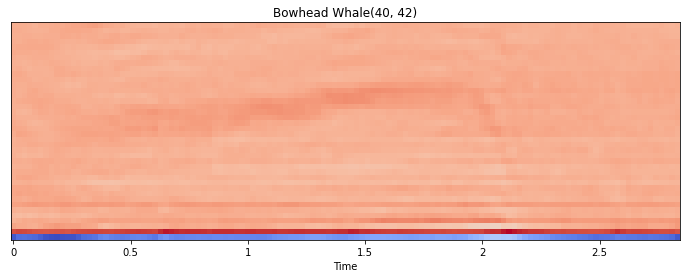

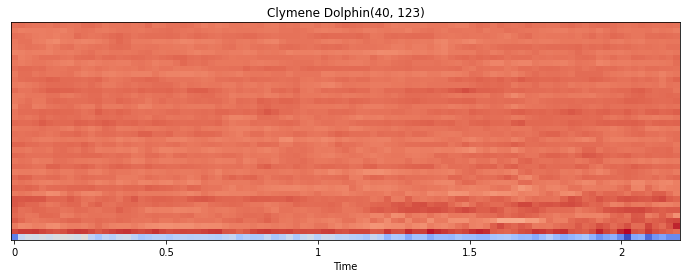

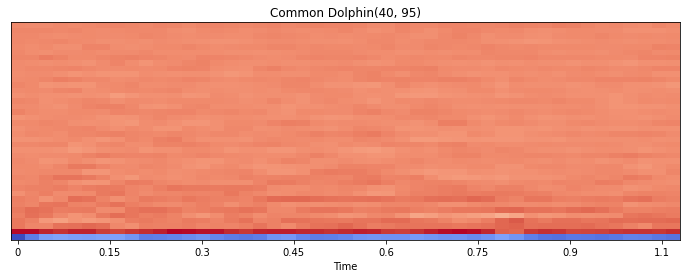

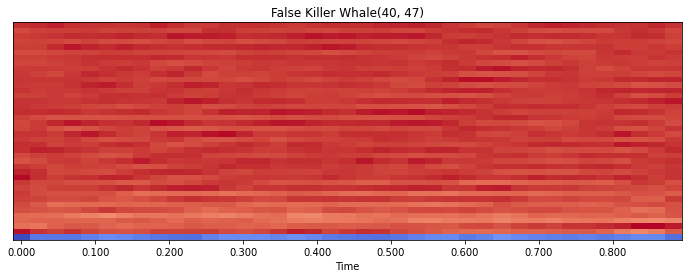

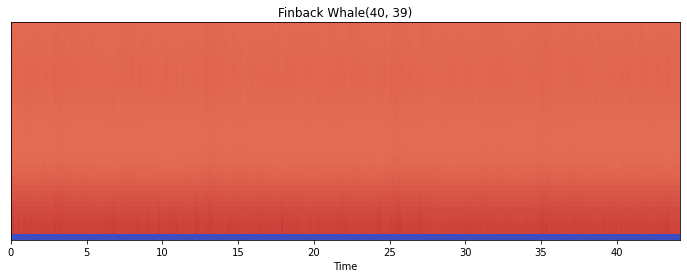

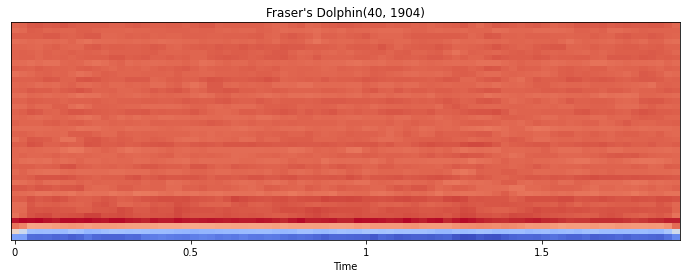

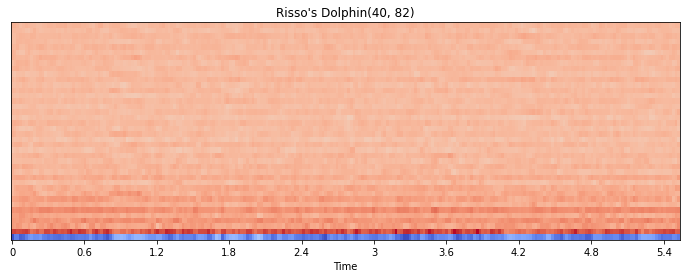

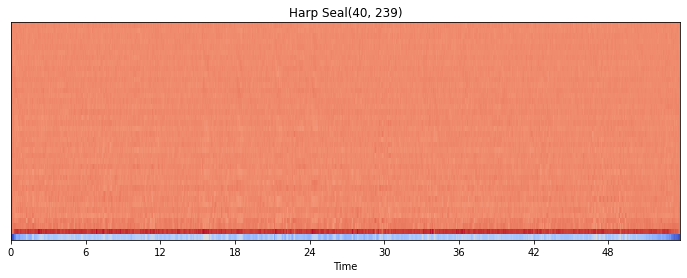

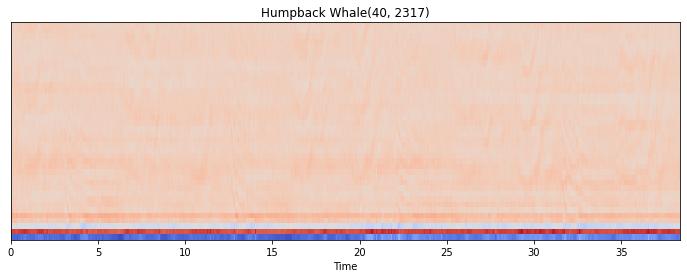

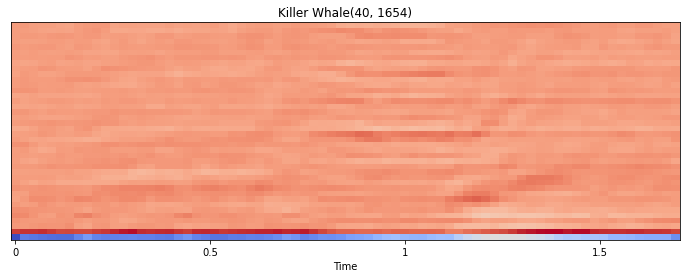

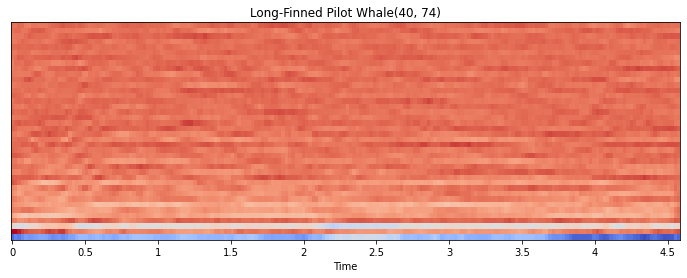

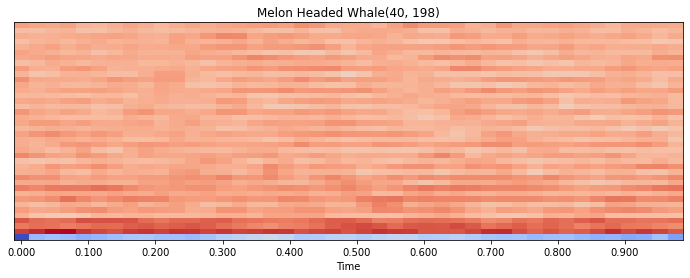

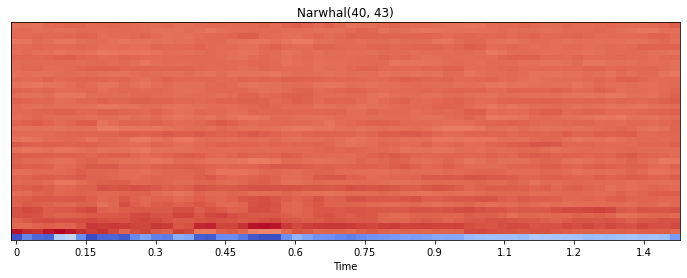

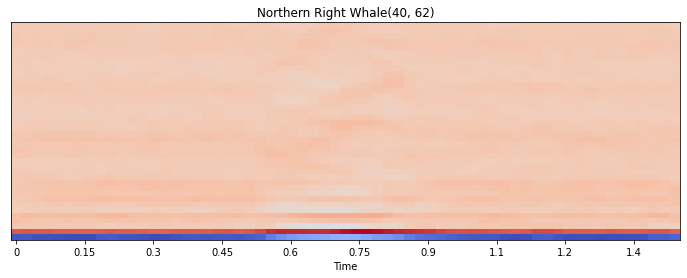

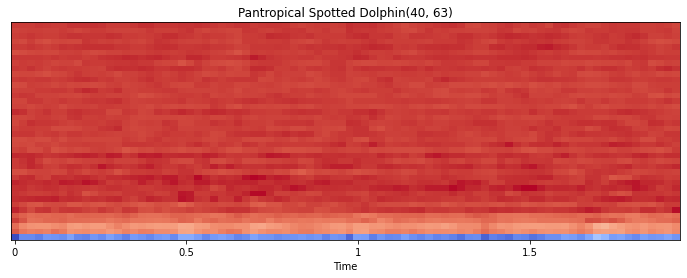

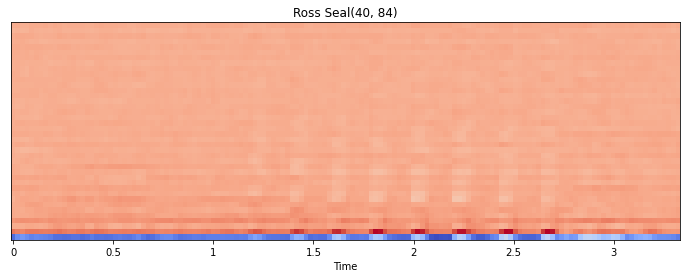

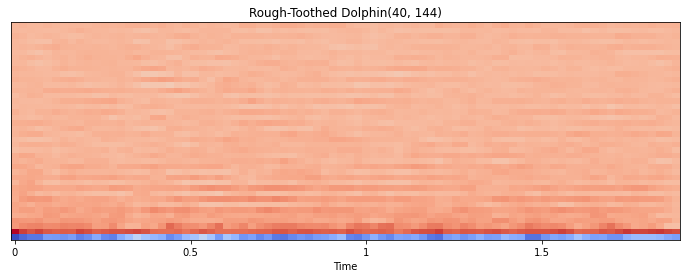

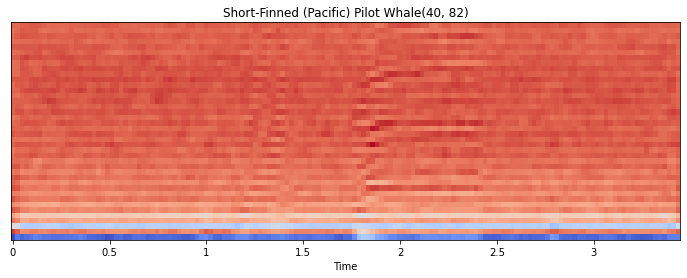

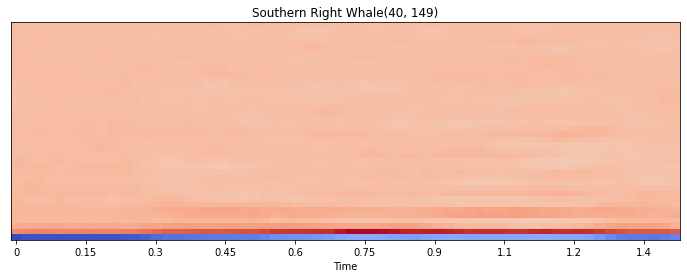

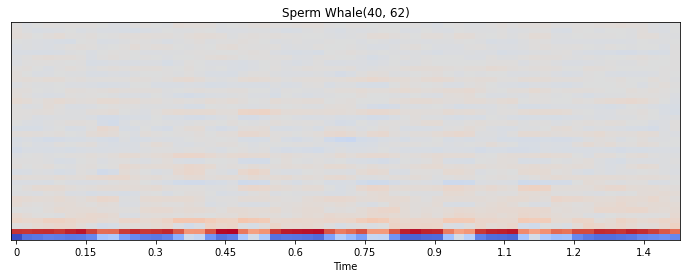

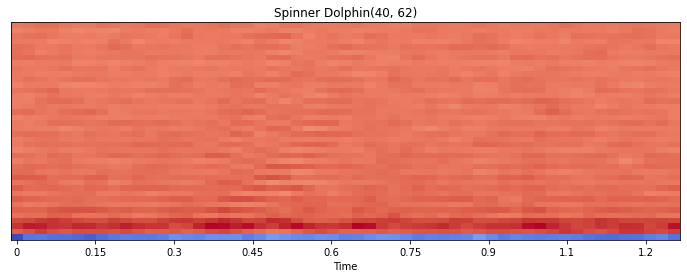

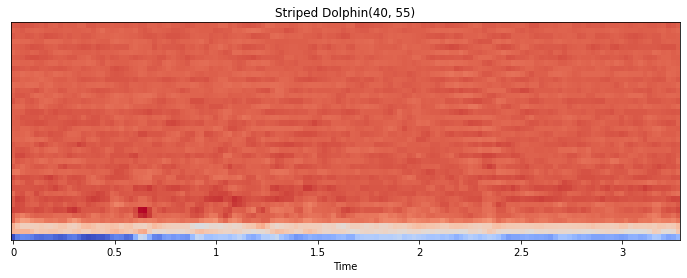

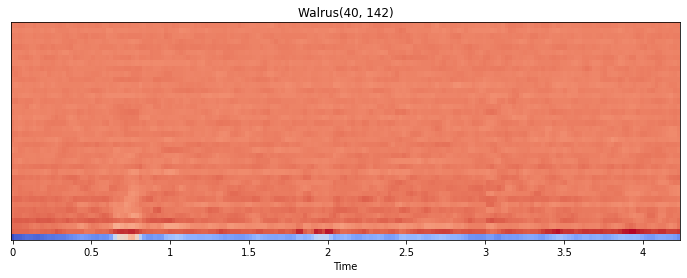

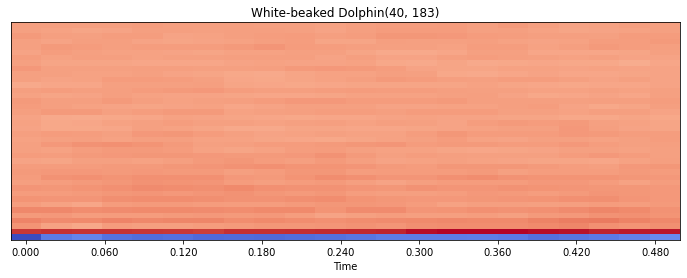

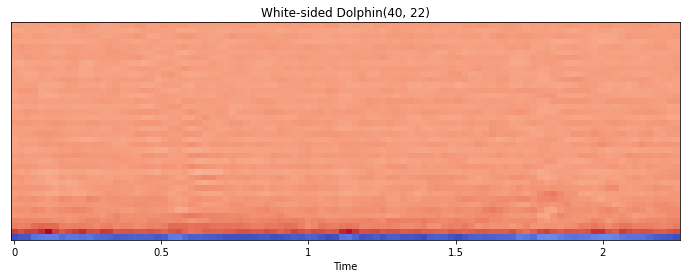

In [35]:
for i in range(size_file_names_list):
    path='../data/'+file_names_list[i]
    data,sample_rate = librosa.load(path)
    plt.figure(figsize=(12,4))
    plt.title(common_name_list[i]+str(mfccs.shape))
    mfccs = librosa.feature.mfcc(y=data, sr=librosa_sample_rate, n_mfcc=40)
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
    

### MFCC for all audio

In [41]:
def extract_MFCC(file_path):
   
    try:
        audio, sample_rate = librosa.load(file_path) 
        mfccs = librosa.feature.mfcc(y=audio, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_path)
        return None 
     
    return mfccsscaled

In [42]:
features=[]
for index, row in metadata.iterrows():
    file_path = '../data/{filename}'.format(filename=row["file_name"])
    class_label = row["common_name"]
    data = extract_MFCC(file_path)
    features.append([data, class_label])
MFCC_df = pd.DataFrame(features, columns=['MFCC','class_label'])
MFCC_df.to_csv('../train_data/mfcc.csv')

E:\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1184
  return f(*args, **kwargs)
E:\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1460
  return f(*args, **kwargs)
E:\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1812
  return f(*args, **kwargs)
E:\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1448
  return f(*args, **kwargs)


In [43]:
MFCC_df

,MFCC,class_label
0,"[-267.44202, 44.580738, 7.408731, 41.20235, 8....",Atlantic Spotted Dolphin
1,"[-264.56714, 40.995678, 26.294147, 22.652586, ...",Atlantic Spotted Dolphin
2,"[-270.93857, 45.52875, 30.258133, 26.010534, 9...",Atlantic Spotted Dolphin
3,"[-239.29222, 16.848509, 5.722767, 60.07696, 1....",Atlantic Spotted Dolphin
4,"[-261.34354, 46.931084, 2.2347364, 46.68957, 6...",Atlantic Spotted Dolphin
...,...,...
1613,"[-190.3521, 41.80875, -33.887226, -22.565973, ...",White-sided Dolphin
1614,"[-180.32697, 23.949991, -27.391582, -31.395538...",White-sided Dolphin
1615,"[-193.31789, 27.349453, -30.72584, -22.095287,...",White-sided Dolphin
1616,"[-197.82957, 36.237118, -35.407524, -25.732468...",White-sided Dolphin


In [46]:
dataset = pd.read_csv('../train_data/mfcc.csv')
dataset

,Unnamed: 0,MFCC,class_label
0,0,[-2.6744202e+02 4.4580738e+01 7.4087310e+00 ...,Atlantic Spotted Dolphin
1,1,[-2.6456714e+02 4.0995678e+01 2.6294147e+01 ...,Atlantic Spotted Dolphin
2,2,[-2.7093857e+02 4.5528751e+01 3.0258133e+01 ...,Atlantic Spotted Dolphin
3,3,[-2.3929222e+02 1.6848509e+01 5.7227669e+00 ...,Atlantic Spotted Dolphin
4,4,[-261.34354 46.931084 2.2347364 4...,Atlantic Spotted Dolphin
...,...,...,...
1613,1613,[-1.9035210e+02 4.1808750e+01 -3.3887226e+01 ...,White-sided Dolphin
1614,1614,[-180.32697 23.949991 -27.391582 -3...,White-sided Dolphin
1615,1615,[-1.9331789e+02 2.7349453e+01 -3.0725840e+01 ...,White-sided Dolphin
1616,1616,[-197.82957 36.237118 -35.407524 -2...,White-sided Dolphin
